<img src="https://github.com/leticiaalmnunes/MQMFuzzy_HubbleLaw/blob/main/imagens/logos_ilum_fundobranco.PNG?raw=true" width="900">

# <center> Ajuste linear fuzzy da lei de Hubble-Lemaître usando o Método de Quadrados Mínimos Fuzzy
    
**Autoria:** `Letícia Nunes` <br>
**Orientador:** `Vinícius Francisco Wasques`
    
---

In [1]:
import Fuzzy_functions as Ff # Script disponível no GitHub
import pandas as pd
import ast

import matplotlib.pyplot as plt
import numpy as np

Para entender como transformamos dados reais em dados fuzzy, confira o caderno `'Fuzzyficação' dos dados de Hubble.ipynb` disponível no [GitHub](https://github.com/leticiaalmnunes/MQMFuzzy_HubbleLaw) do projeto.

In [2]:
df_hubble_0 = pd.read_csv('Hubble_fuzzy.txt') # dados fuzzy

cols = df_hubble_0.columns # extraindo o nome das colunas
df_hubble_0[cols[1]] = df_hubble_0[cols[1]].apply(ast.literal_eval) # correção para que a tupla não seja interpretada como string
df_hubble = Ff.extrai_dataframe(df_hubble_0) # deixando os dados no formato aceito pelas funções

### <center>Soluções obtidas</center>

In [3]:
solucoes = Ff.sistema_fuzzy (df_hubble)

Ff.exibe_linfunc_fuzzy(solucoes)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### <center>Visualização 2D do ajuste obtido</center>

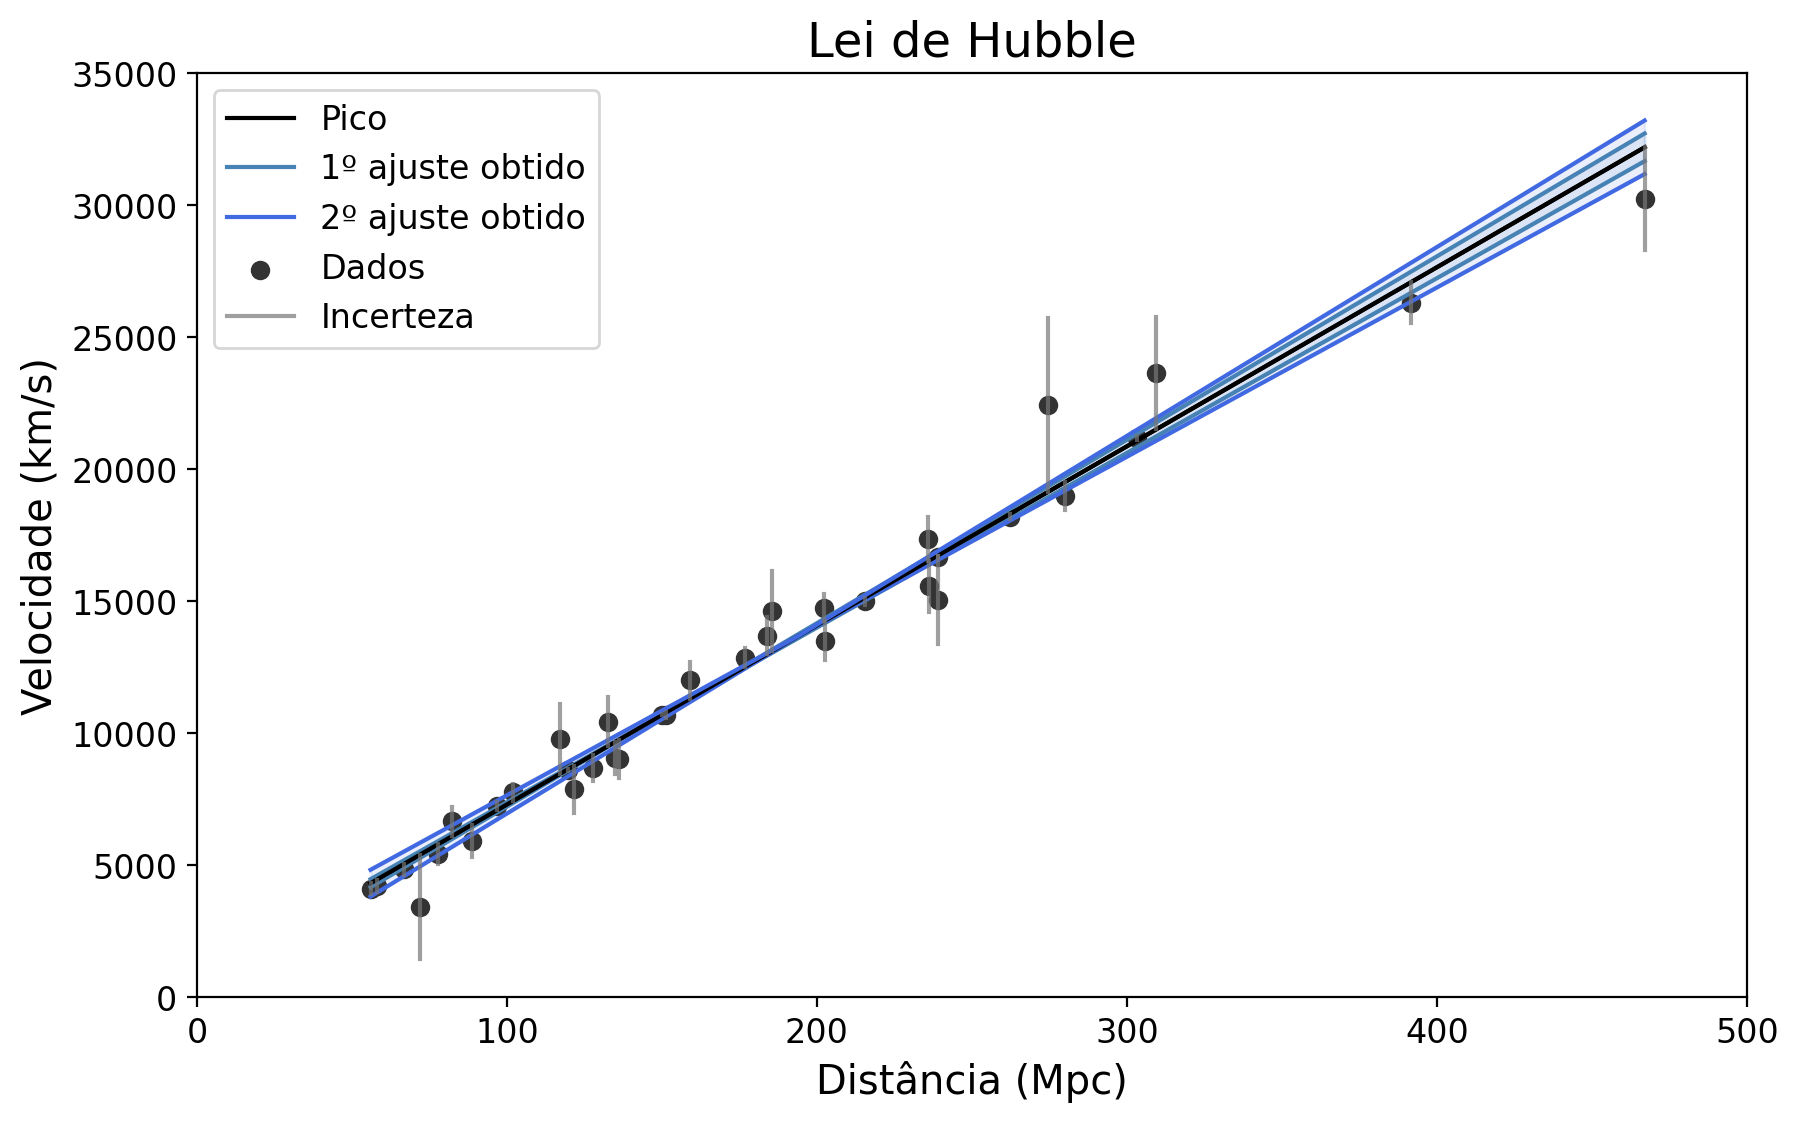

In [4]:
argumentos_plot_2D = {
    'df': df_hubble,
    'solucoes': solucoes,
    'titulo': 'Lei de Hubble',
    'nome_x': 'Distância (Mpc)',
    'nome_y': 'Velocidade (km/s)',
    'label_dado': 'Dados',
    'cores': ['steelblue','royalblue', 'purple', 'green'], # escolha as cores da solução
    'sep_solutions': False, # mude para "True" se quiser as soluções separadas em gráficos únicos
    'save_fig': False, # mude para "True" se quiser salvar as imagens
}

Ff.plota_ajuste_fuzzy_2D(**argumentos_plot_2D)

### <center>Visualização 3D do ajuste obtido</center>

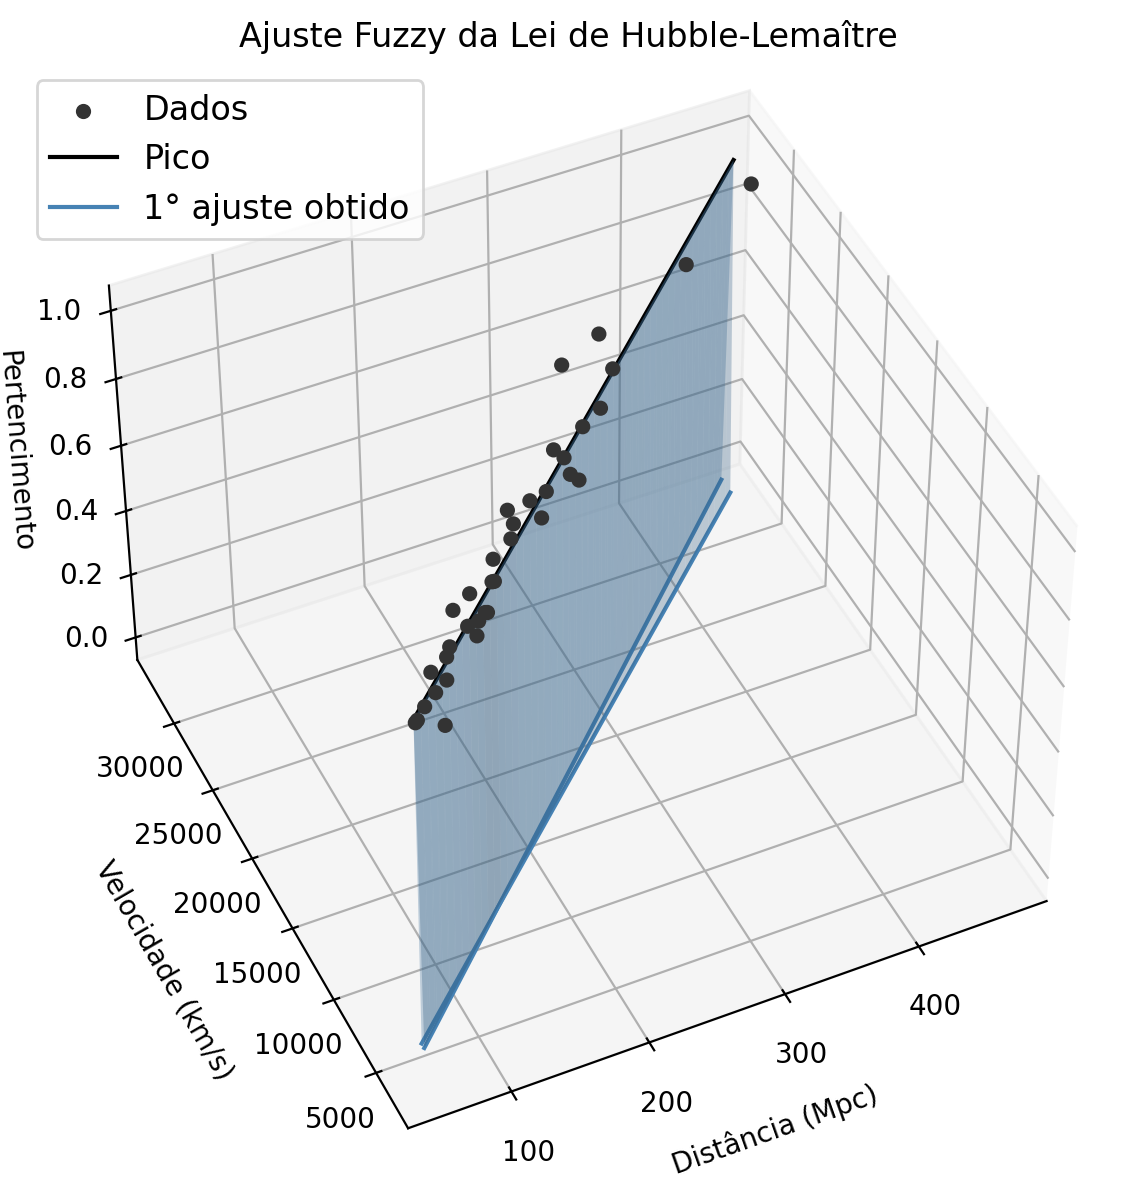

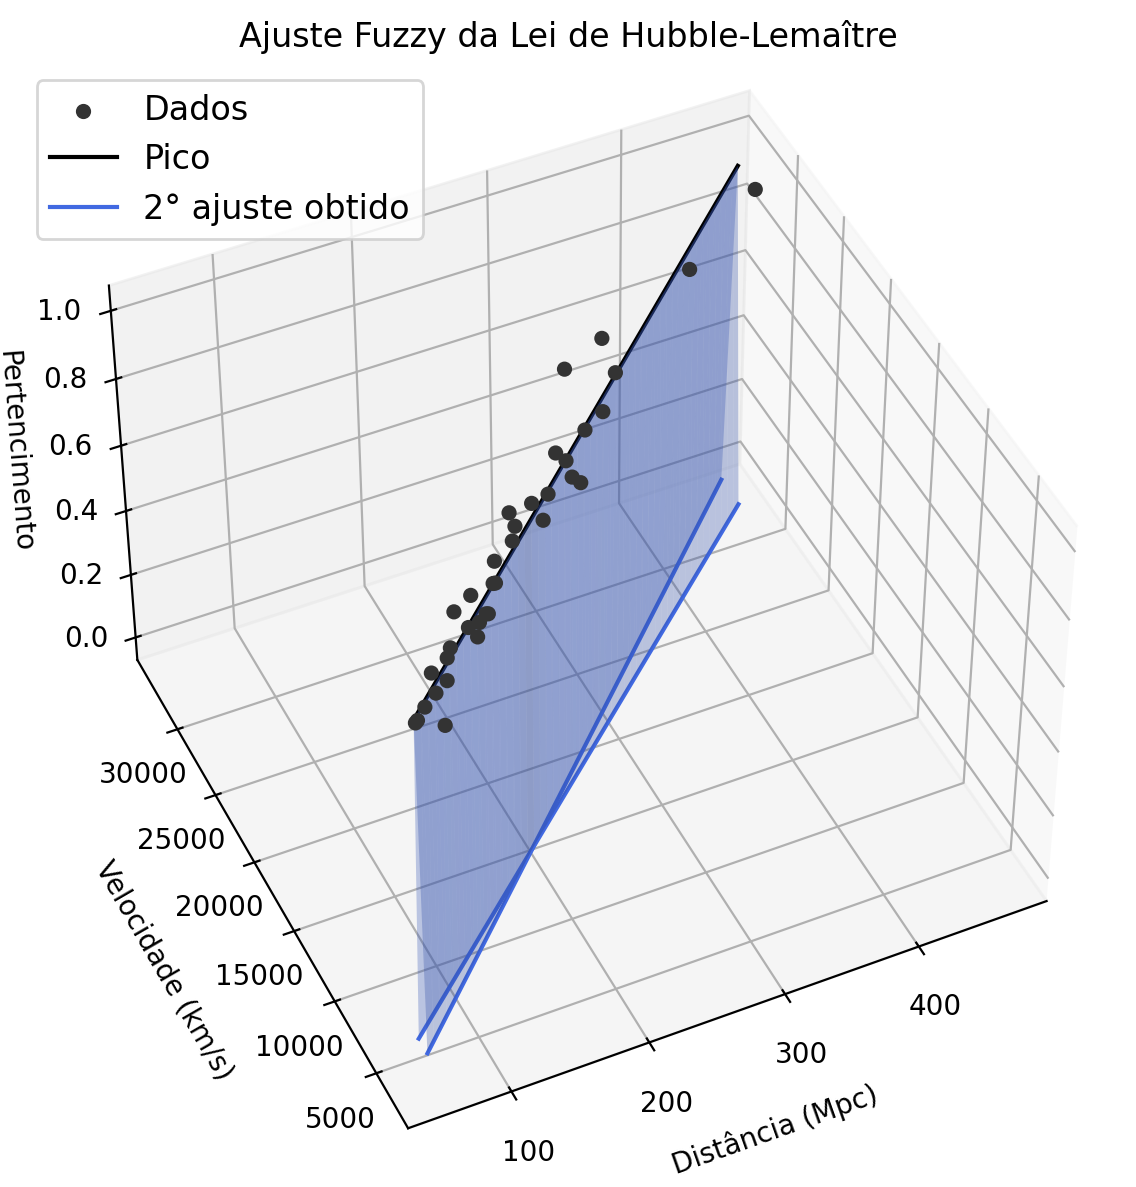

In [5]:
argumentos_plot_3D = {
    'df': df_hubble,
    'solucoes': solucoes,
    'titulo': 'Ajuste Fuzzy da Lei de Hubble-Lemaître',
    'nome_x': 'Distância (Mpc)',
    'nome_y': 'Velocidade (km/s)',
    'label_dado': 'Dados',
    'cores': ['steelblue','royalblue','blue','darkgreen'],
    'save_fig': False,
}

Ff.plota_ajuste_fuzzy_3D (**argumentos_plot_3D)

---

### Obtendo o diâmetro da solução em função da distância

In [6]:
X = df_hubble_0[cols[0]]
diametros = []

for sol in solucoes:
    C1 = sol[0]
    C2 = sol[1]
    ys=[]
    diams=[]
    
    for x in X:
        ax = Ff.mult_Ft_e (C1,x)
        ys.append(Ff.soma0_Ft(ax,C2))
            
    for y in ys:
        diams.append(Ff.diametro(y))
    
    diametros.append(diams)

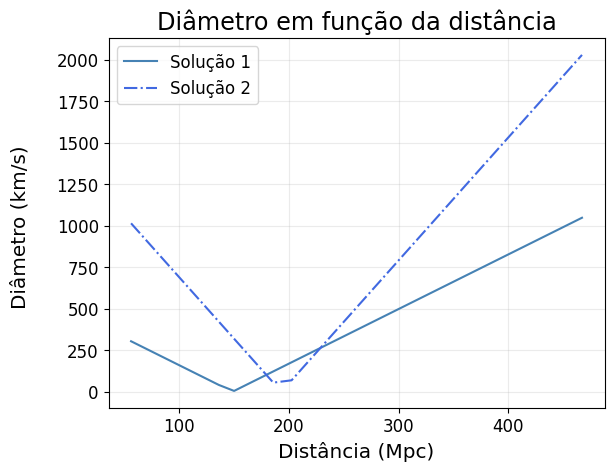

In [7]:
c=0
cores = ['steelblue','royalblue','blue','darkgreen']
estilos = ['-', '-.']

for c, diam in enumerate(diametros):
    plt.plot(X, diam, color=cores[c], linestyle=estilos[c], label=f'Solução {c+1}')

plt.title('Diâmetro em função da distância', fontsize='xx-large')
plt.xlabel('Distância (Mpc)', fontsize='x-large')
plt.xticks(fontsize='large')
plt.ylabel('Diâmetro (km/s) \n', fontsize='x-large')
plt.yticks(fontsize='large')
plt.legend(loc='upper left', fontsize='large')
plt.grid(alpha=0.25)

---